<a href="https://colab.research.google.com/github/abdelbasetab/machine_learning_projects/blob/main/sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd


housing_pd = pd.read_csv("housing.csv")
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_pd['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [17]:
housing_pd_suffled = housing_pd.sample(n = len(housing_pd),random_state=1)# take a simple but hier i take all the data as a simple
housing_pd_suffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [11]:
pd.get_dummies(housing_pd_suffled['ocean_proximity']).head() #

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [12]:
housing_pd_suffled.drop('ocean_proximity',axis=1).head() # 1/0 -> row or column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [28]:
housing_pd_final = pd.concat([housing_pd_suffled.drop('ocean_proximity',axis=1),pd.get_dummies(housing_pd_suffled['ocean_proximity'])],axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [29]:
housing_pd_final = housing_pd_final[['longitude','latitude',
                                     'housing_median_age','total_rooms',
                                     'total_bedrooms','population',
                                     'households','median_income',
                                     '<1H OCEAN','INLAND','ISLAND',
                                     'NEAR BAY','NEAR OCEAN','median_house_value']] # change the columns

housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [31]:
# data cleaning , remove all the rows that das null value
housing_pd_final = housing_pd_final.dropna()# drop null value
len(housing_pd_final)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [32]:
train_pd, test_pd, validate_pd = housing_pd_final[:18000],housing_pd_final[18000:19215],housing_pd_final[19215:] # each variable take some of the data

len(train_pd),len(test_pd),len(validate_pd)

(18000, 1215, 1218)

In [36]:
x_train, y_train = train_pd.to_numpy()[:,:-1],train_pd.to_numpy()[:,-1] # the x take all the column except the last one, and y take just the last one

x_validate, y_validate = validate_pd.to_numpy()[:,:-1],validate_pd.to_numpy()[:,-1]

x_test, y_test = test_pd.to_numpy()[:,:-1],test_pd.to_numpy()[:,-1]

x_train.shape, y_train.shape, x_validate.shape, y_validate.shape, x_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1215, 13), (1215,))

In [51]:
# we need to change the scalle that we have, if we leave it like this, our model will think the difference between, 800 and 850 is better then th difference between 1 and 8

from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler() # create object
scaler.fit(x_train[:,:8]) # fit the data, 0 -> 7
def preprocessing(x):
  A = np.copy(x)
  A[:,:8] = scaler.transform(A[:,:8])#
  A = np.where(A == True, 1, A)  # Convert True to 1
  A = np.where(A == False, 0, A)  # Convert False to 0
  A = A.astype(float) # convert to float
  return A
x_train_preprocessed = preprocessing(x_train)
x_validate_preprocessed = preprocessing(x_validate)
x_test_preprocessed = preprocessing(x_test)
x_train_preprocessed


array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [52]:
pd.DataFrame(x_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.728191,-0.815647,0.423168,-0.057912,0.134325,0.111802,0.120643,-0.349320,1.0,0.0,0.0,0.0,0.0
17996,-0.459404,0.785191,1.298057,-0.368023,-0.277849,-0.015390,-0.241986,-0.956265,0.0,1.0,0.0,0.0,0.0
17997,0.593464,-0.731392,-0.610792,0.468908,0.996794,0.077354,1.027213,-0.165155,1.0,0.0,0.0,0.0,0.0
17998,1.127382,-0.731392,0.900380,0.139013,0.463112,0.531359,0.464877,-0.923784,0.0,1.0,0.0,0.0,0.0


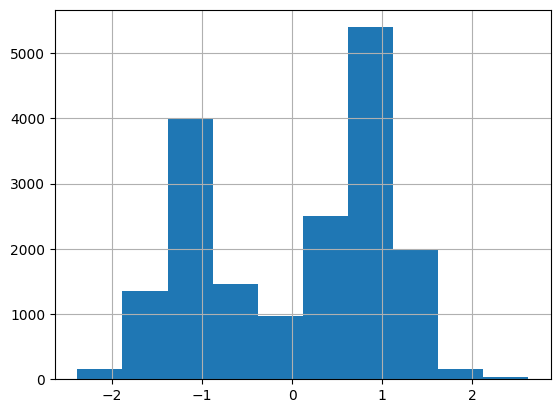

In [55]:
df_train = pd.DataFrame(x_train_preprocessed)[0].hist()


In [58]:
# sum((y - y_pred)^2) / n  <-- this is our mean_squared_error function

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train,y_train)
mse(lm.predict(x_train),y_train,squared=False),mse(lm.predict(x_validate),y_validate,squared=False)



(68593.05578127236, 71382.43558330215)

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(x_train,y_train)
mse(knn.predict(x_train),y_train,squared=False),mse(knn.predict(x_validate),y_validate,squared=False)


(86888.62732577053, 94660.255396805)

In [67]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(x_train,y_train)
mse(rfr.predict(x_train),y_train,squared=False),mse(rfr.predict(x_validate),y_validate,squared=False)

(43659.981244186296, 53518.19280388128)

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(x_train,y_train)
mse(gbr.predict(x_train),y_train,squared=False),mse(gbr.predict(x_validate),y_validate,squared=False)

(47274.82259072157, 51409.28214649382)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Solution of error typ
x_train = np.array(x_train).astype(float)
y_train = np.array(y_train).astype(float)
x_validate = np.array(x_validate).astype(float)
y_validate = np.array(y_validate).astype(float)
x_test = np.array(x_test).astype(float)
y_test = np.array(y_test).astype(float)


simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.1)
cp = ModelCheckpoint('models/simple_nn.keras',save_best_only=True)
simple_nn.compile(loss='mse',optimizer=opt,metrics=[RootMeanSquaredError()])
simple_nn.fit(x=x_train,y=y_train,validation_data=(x_validate,y_validate),epochs=100,callbacks=[cp])

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 30780495872.0000 - root_mean_squared_error: 174198.1250 - val_loss: 14667902976.0000 - val_root_mean_squared_error: 121111.1172
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12223096832.0000 - root_mean_squared_error: 110526.2188 - val_loss: 11590071296.0000 - val_root_mean_squared_error: 107657.1953
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10760655872.0000 - root_mean_squared_error: 103725.5078 - val_loss: 11164624896.0000 - val_root_mean_squared_error: 105662.7891
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10765352960.0000 - root_mean_squared_error: 103744.7578 - val_loss: 10996871168.0000 - val_root_mean_squared_error: 104865.9688
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9921854464.0000 - root_mean_squared_error: 99602.4922 - val_loss: 10364783616.0000 - val_root_mean_squared_error: 101807.5781
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [89]:
from tensorflow.keras.models import load_model


simple_nn=load_model('models/simple_nn.keras')
mse(simple_nn.predict(x_train),y_train,squared=False),mse(simple_nn.predict(x_validate),y_validate,squared=False)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(69502.02003308761, 72280.5462599618)